<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/CROSS_SUBSTRATE_TRAINING_XGBOOST_WITH_TREESHAP_TRAIN_NEIL1_AND_AJUBA_PREDICT_TTYH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Uncomment these lines if running as a google colab notebook: 
#!pip install numpy==1.15
#! git clone https://github.com/kundajelab/adar_editing
#import os
#os.chdir("adar_editing/xgboost_with_shap/")
#!pip install shap
#!pip install --upgrade xgboost
#!pip install cufflinks

In [2]:
%load_ext autoreload
%autoreload 2   

In [3]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [4]:
#helper utilities for model training and interpretation 
import shap
from helpers import * 

#set a random seed so code is reproducible 
random.seed(1234)

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.plotly as py
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap


/users/annashch/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/users/annashch/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
## Load all the datasets : TTYH2
ttyh2_comp=pd.read_csv("../xin_feature_matrices/ttyh2_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ttyh2_comp=ttyh2_comp[~ttyh2_comp["editing_value"].isnull().values]
ttyh2_comp=format_for_xgboost(ttyh2_comp)

(601, 216)


In [6]:
## Load all the datasets: NEIL1
neil1_comp=pd.read_csv("../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
neil1_comp=neil1_comp[~neil1_comp["editing_value"].isnull().values]
neil1_comp=format_for_xgboost(neil1_comp)

(428, 219)


In [7]:
## Load all the dtasets: AJUBA
ajuba_comp=pd.read_csv("../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ajuba_comp=ajuba_comp[~ajuba_comp["editing_value"].isnull().values]
ajuba_comp=format_for_xgboost(ajuba_comp)

(482, 186)


In [8]:
train_split,eval_split=split_train_eval_by_mut_pos(ttyh2_comp[~ttyh2_comp['mut_pos'].isna()])
null_mut_pos=train_split[train_split['mut_pos'].isna()]
train_split=pd.concat((train_split,null_mut_pos),axis=0)

{21.0: 18, 22.0: 18, 23.0: 18, 24.0: 20, 25.0: 17, 26.0: 20, 27.0: 20, 28.0: 20, 29.0: 18, 30.0: 18, 31.0: 17, 32.0: 17, 33.0: 17, 34.0: 18, 35.0: 18, 36.0: 18, 79.0: 17, 80.0: 17, 81.0: 18, 82.0: 18, 83.0: 19, 84.0: 19, 85.0: 20, 86.0: 29, 88.0: 27, 89.0: 18, 90.0: 17, 91.0: 17, 92.0: 17, 93.0: 14, 94.0: 36}


## Train TTYH2, predict NEIL1

In [9]:
test_split=neil1_comp

In [10]:
train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [11]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [12]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [13]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

u3_3prm_cp_bulge:G:C
u1_5prm_cp_bulge:G:C
d3_length_hairpin
site_length_hairpin
d1_5prm_cp_internal:C:G
u1_length_bulge
u3_5prm_cp_bulge:U:A
u3_5prm_cp_bulge:C:G
u3_struct:B
u2_3prm_cp_bulge:U:G
d2_5prm_cp_hairpin
u3_exist
mut_type:indel
d1_length_internal_ecs
u_hairpin_length
u2_exist
d3_length_internal_ecs
u2_struct:E
d1_3prm_cp_internal:C:G
mut_ref_struct:S
d1_3prm_cp_internal:G:C
u1_3prm_cp_bulge:A:U
u1_struct:S
u3_5prm_cp_internal
u2_length_internal_es
mut_exist
u1_3prm_cp_internal
d1_5prm_cp_internal:G:C
d3_struct:B
mut_type:mismatch
d3_5prm_cp_hairpin
mut_ref_struct:I
site_3prm_cp_internal:A:U
mut_same_as_site
u3_3prm_cp_internal
u1_5prm_cp_hairpin:A:U
d2_5prm_cp_internal:U:G
u1_length_hairpin
u1_length_internal_ecs
u1_5prm_cp_bulge:U:G
site_prev_struct:H
d1_3prm_cp_bulge
d1_5prm_cp_hairpin
mut_ref_struct:B
u1_struct:H
d3_3prm_cp_internal:U:A
mut_next_struct:E
d2_3prm_cp_internal:U:A
mut_type:wt
u1_5prm_cp_internal
u2_length_internal_ecs
site_5prm_cp_hairpin
site_3prm_cp_bulge:G

In [14]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [15]:

train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [16]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(494, 121)
(494,)
(83, 121)
(83,)
(428, 218)
(428,)


In [17]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [18]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['site_1_1:A:G', 'site_prev_nt:C', 'site_5prm_cp_internal:C:G', 'u2_length_bulge', 'site_prev_nt:A', 'site_length', 'u3_length_hairpin', 'u3_struct:H', 'u1_length', 'probability_active_conf', 'u3_struct:S', 'mut_next_struct:I', 'mut_next_struct:H', 'u2_length_stem', 'site_1_1:A:C', 'mut_site_dist', 'all_stem_length', 'u1_length_stem', 'site_1_1:A:U', 'mut_prev_struct:I', 'u2_length', 'd2_5prm_cp_bulge:C:G', 'd1_length', 'd1_struct:S', 'num_mutations', 'd3_length_stem', 'u2_distance', 'site_struct:B', 'mut_nt:C', 'site_prev_struct:S', 'mut_ref_nt:C', 'u3_distance', 'mut_ref_nt:G', 'mut_nt:G', 'site_struct:I', 'u2_struct:S', 'u3_length_stem', 'site_next_nt:A', 'site_3prm_cp_internal:G:C', 'u2_5prm_cp_bulge:G:C', 'mut_pos', 'mut_ref_nt:U', 'site_3prm_cp_internal:G:U', 'mut_prev_struct:S', 'site_length_stem', 'site_length_internal_ecs', 'site_3prm_cp_bulge:G:C', 'u_all_stem_length', 'd2_3prm_cp_bulge:U:A', 'u3_length', 'mut_struct:B', 'd2_3prm_cp_bulge:C:G', 'site_5prm_cp_internal:G:C', 'm

In [19]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [20]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [21]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [22]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-aucpr:0.288781	eval-auc:0.765401	eval-mae:0.28158	eval-map:1	eval-rmse:0.30006	train-aucpr:0.310435	train-auc:0.720448	train-mae:0.243029	train-map:1	train-rmse:0.261071
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-aucpr:0.303631	eval-auc:0.780342	eval-mae:0.207871	eval-map:1	eval-rmse:0.223853	train-aucpr:0.325273	train-auc:0.731621	train-mae:0.172954	train-map:1	train-rmse:0.189346
[2]	eval-aucpr:0.308871	eval-auc:0.796405	eval-mae:0.15643	eval-map:1	eval-rmse:0.170233	train-aucpr:0.329601	train-auc:0.742144	train-mae:0.125051	train-map:1	train-rmse:0.139325
[3]	eval-aucpr:0.315191	eval-auc:0.806457	eval-mae:0.121885	eval-map:1	eval-rmse:0.1323	train-aucpr:0.339476	train-auc:0.750171	train-mae:0.090566	train-map:1	train-rmse:0.102755
[4]	eval-aucpr:0.317076	eval-auc:0.811771	eval-mae:0.096176	eval-map:1	eval-rmse:0.105635	train-aucpr:0.342247	train-auc:0.754155	train-

[45]	eval-aucpr:0.32535	eval-auc:0.826776	eval-mae:0.026172	eval-map:1	eval-rmse:0.040375	train-aucpr:0.351621	train-auc:0.767062	train-mae:0.003362	train-map:1	train-rmse:0.004724
[46]	eval-aucpr:0.325391	eval-auc:0.826891	eval-mae:0.026025	eval-map:1	eval-rmse:0.040172	train-aucpr:0.351645	train-auc:0.767085	train-mae:0.003131	train-map:1	train-rmse:0.004352
[47]	eval-aucpr:0.325197	eval-auc:0.826692	eval-mae:0.026017	eval-map:1	eval-rmse:0.040218	train-aucpr:0.351656	train-auc:0.767092	train-mae:0.003	train-map:1	train-rmse:0.004181
[48]	eval-aucpr:0.325291	eval-auc:0.826726	eval-mae:0.025938	eval-map:1	eval-rmse:0.04017	train-aucpr:0.351663	train-auc:0.767104	train-mae:0.002918	train-map:1	train-rmse:0.004114
[49]	eval-aucpr:0.325334	eval-auc:0.826851	eval-mae:0.025889	eval-map:1	eval-rmse:0.040161	train-aucpr:0.351669	train-auc:0.76711	train-mae:0.002828	train-map:1	train-rmse:0.003993
[50]	eval-aucpr:0.325352	eval-auc:0.826896	eval-mae:0.025796	eval-map:1	eval-rmse:0.040111	train

[91]	eval-aucpr:0.325364	eval-auc:0.826904	eval-mae:0.024898	eval-map:1	eval-rmse:0.039588	train-aucpr:0.351779	train-auc:0.767221	train-mae:0.001088	train-map:1	train-rmse:0.001584
[92]	eval-aucpr:0.325364	eval-auc:0.826904	eval-mae:0.024898	eval-map:1	eval-rmse:0.039588	train-aucpr:0.351779	train-auc:0.767221	train-mae:0.001088	train-map:1	train-rmse:0.001584
[93]	eval-aucpr:0.325364	eval-auc:0.826904	eval-mae:0.024898	eval-map:1	eval-rmse:0.039588	train-aucpr:0.351779	train-auc:0.767221	train-mae:0.001088	train-map:1	train-rmse:0.001584
Stopping. Best iteration:
[83]	eval-aucpr:0.325364	eval-auc:0.826904	eval-mae:0.024898	eval-map:1	eval-rmse:0.039588	train-aucpr:0.351779	train-auc:0.767221	train-mae:0.001088	train-map:1	train-rmse:0.001584



In [23]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [35]:
## Get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred,
                                   positive_thresh=0.4)

Train
	Spearman corr : SpearmanrResult(correlation=0.9998136817134163, pvalue=0.0)
	Pearson corr : (0.9999261275679872, 0.0)
	MAE : 0.0010882215170884455
	MAPE : 0.012767256980543486
	RMSE : 0.0015836894735694034
	auPRC : 1.0
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.9560626469660999, pvalue=6.32636858163055e-45)
	Pearson corr : (0.962761596863057, 8.885873241664178e-48)
	MAE : 0.02489789992197226
	MAPE : 0.4246684037536328
	RMSE : 0.039588207854120906
	auPRC : 0.3194444444444444
	auROC : 0.95
Test
	Spearman corr : SpearmanrResult(correlation=0.05493961084539245, pvalue=0.25673907499161464)
	Pearson corr : (0.2200439795413119, 4.3184380660862125e-06)
	MAE : 0.2026764226449984
	MAPE : 2.91589169020608
	RMSE : 0.23368560703851812
	auPRC : 0.5129105539724227
	auROC : 0.6072502465661158


In [31]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9998136817134163, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.9560626469660999, pvalue=6.32636858163055e-45)
Test:SpearmanrResult(correlation=0.05493961084539245, pvalue=0.25673907499161464)


Pearson correlation:
Train:(0.9999261275679872, 0.0)
Eval:(0.962761596863057, 8.885873241664178e-48)
Test:(0.2200439795413119, 4.3184380660862125e-06)


In [32]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0010882215170884455
MAE Eval:0.02489789992197226
MAE Test:0.2026764226449984


In [33]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:1.2767256980543487%
MAPE Eval:42.466840375363276%
MAPE Test:291.589169020608%


In [34]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0015836894735694034
RMSE Eval:0.039588207854120906
RMSE Test:0.23368560703851812


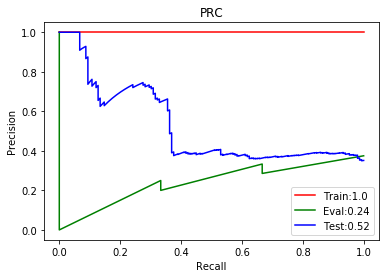

In [36]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.4,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

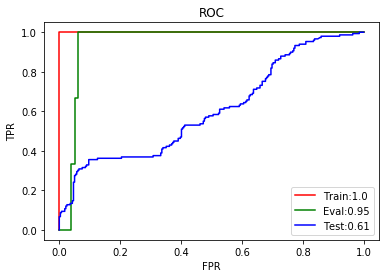

In [37]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.4,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.4,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

In [40]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals = test_y - test_pred

y_test_mean = np.mean(test_pred)
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y-y_test_mean)*(test_y-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.22948766
24.30542034512238
23.372636137019203
The R-square of the test data is  0.038 



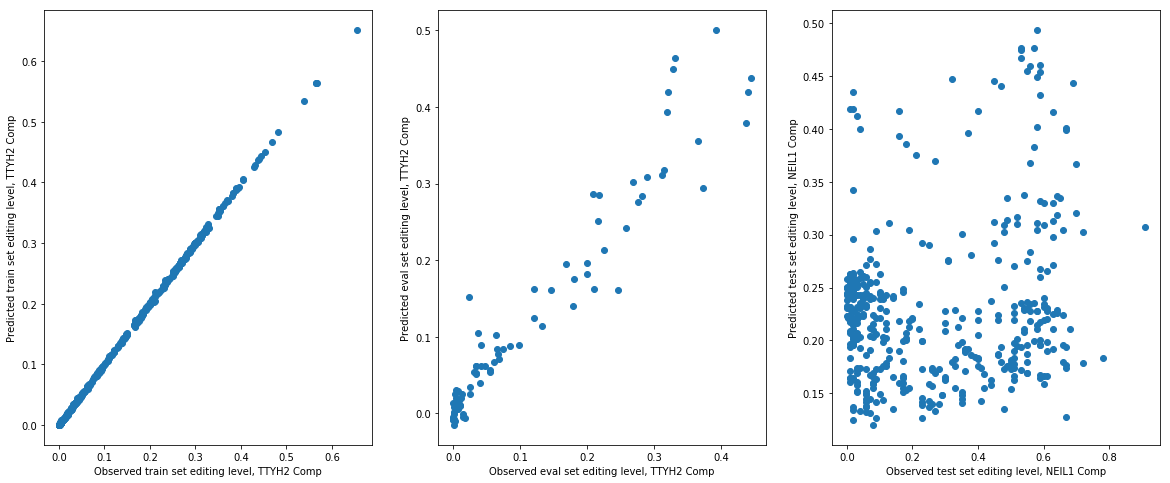

In [38]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, TTYH2 Comp")
plt.ylabel("Predicted train set editing level, TTYH2 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, TTYH2 Comp")
plt.ylabel("Predicted eval set editing level, TTYH2 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, NEIL1 Comp")
plt.ylabel("Predicted test set editing level, NEIL1 Comp")

plt.show()

## Train TTYH2, predict AJUBA

In [41]:
test_split=ajuba_comp

In [42]:
train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [43]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [44]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [45]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

u1_length_internal_ecs
u3_5prm_cp_internal
u2_length_internal_es
d3_3prm_cp_bulge
u2_5prm_cp_internal
d1_5prm_cp_hairpin
site_length_hairpin
d3_length_hairpin
u1_3prm_cp_internal
d3_5prm_cp_bulge
u1_length_internal_es
d2_5prm_cp_hairpin
d2_5prm_cp_bulge
d3_5prm_cp_hairpin
u1_5prm_cp_hairpin
d2_length_bulge
d3_exist
u1_5prm_cp_internal
u2_length_internal_ecs
site_5prm_cp_hairpin
u3_length_internal_es
d1_length_hairpin
u2_3prm_cp_internal
u2_exist
d1_exist
u3_3prm_cp_internal
d2_length_hairpin
d2_exist
u3_length_internal_ecs
u1_length_hairpin
d2_3prm_cp_bulge
u1_exist
d3_length_bulge


In [46]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [47]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [48]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(494, 120)
(494,)
(83, 120)
(83,)
(482, 152)
(482,)


In [49]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [50]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['site_1_1:A:G', 'site_prev_nt:C', 'site_5prm_cp_internal:C:G', 'site_next_struct:B', 'u2_length_bulge', 'site_prev_nt:A', 'site_length', 'u3_length_hairpin', 'u3_struct:H', 'u1_length', 'probability_active_conf', 'u3_struct:S', 'mut_next_struct:I', 'u2_length_stem', 'site_1_1:A:C', 'mut_site_dist', 'all_stem_length', 'u1_length_stem', 'site_1_1:A:U', 'mut_prev_struct:I', 'u2_length', 'd1_length', 'd1_struct:S', 'num_mutations', 'd3_length_stem', 'd1_5prm_cp_bulge:C:G', 'u2_distance', 'site_struct:B', 'site_next_nt:G', 'mut_nt:C', 'site_prev_struct:S', 'mut_ref_nt:C', 'u3_distance', 'mut_ref_nt:G', 'mut_nt:G', 'site_struct:I', 'u2_struct:S', 'u3_length_stem', 'site_next_nt:A', 'site_3prm_cp_internal:G:C', 'mut_pos', 'mut_ref_nt:U', 'site_5prm_cp_bulge:G:C', 'mut_prev_struct:S', 'site_length_stem', 'site_length_internal_ecs', 'site_3prm_cp_bulge:G:C', 'u_all_stem_length', 'u3_length', 'mut_struct:B', 'u3_5prm_cp_hairpin:A:U', 'site_5prm_cp_internal:G:C', 'mut_struct:S', 'd1_length_stem'

In [51]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [52]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [53]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [54]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-aucpr:0.217524	eval-auc:0.610049	eval-mae:0.278397	eval-map:1	eval-rmse:0.299145	train-aucpr:0.312921	train-auc:0.718807	train-mae:0.242982	train-map:1	train-rmse:0.2612
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-aucpr:0.259003	eval-auc:0.734504	eval-mae:0.207283	eval-map:1	eval-rmse:0.223995	train-aucpr:0.324698	train-auc:0.730429	train-mae:0.172902	train-map:1	train-rmse:0.189533
[2]	eval-aucpr:0.28596	eval-auc:0.786349	eval-mae:0.159252	eval-map:1	eval-rmse:0.172933	train-aucpr:0.333523	train-auc:0.742845	train-mae:0.123724	train-map:1	train-rmse:0.138379
[3]	eval-aucpr:0.296734	eval-auc:0.801461	eval-mae:0.118277	eval-map:1	eval-rmse:0.129567	train-aucpr:0.338424	train-auc:0.74976	train-mae:0.089918	train-map:1	train-rmse:0.102669
[4]	eval-aucpr:0.298261	eval-auc:0.806732	eval-mae:0.091123	eval-map:1	eval-rmse:0.100681	train-aucpr:0.34187	train-auc:0.753321	train-

[45]	eval-aucpr:0.318084	eval-auc:0.822254	eval-mae:0.026659	eval-map:1	eval-rmse:0.045895	train-aucpr:0.351547	train-auc:0.767002	train-mae:0.003708	train-map:1	train-rmse:0.005387
[46]	eval-aucpr:0.318082	eval-auc:0.822239	eval-mae:0.026617	eval-map:1	eval-rmse:0.045838	train-aucpr:0.351554	train-auc:0.76701	train-mae:0.003626	train-map:1	train-rmse:0.00525
[47]	eval-aucpr:0.317962	eval-auc:0.822079	eval-mae:0.026538	eval-map:1	eval-rmse:0.045783	train-aucpr:0.351555	train-auc:0.767015	train-mae:0.003538	train-map:1	train-rmse:0.005151
[48]	eval-aucpr:0.317833	eval-auc:0.821696	eval-mae:0.026647	eval-map:1	eval-rmse:0.045802	train-aucpr:0.351583	train-auc:0.767044	train-mae:0.00338	train-map:1	train-rmse:0.004896
[49]	eval-aucpr:0.317838	eval-auc:0.821722	eval-mae:0.026596	eval-map:1	eval-rmse:0.045792	train-aucpr:0.351599	train-auc:0.767052	train-mae:0.003255	train-map:1	train-rmse:0.004747
[50]	eval-aucpr:0.317904	eval-auc:0.821787	eval-mae:0.026751	eval-map:1	eval-rmse:0.045926	tr

[91]	eval-aucpr:0.319143	eval-auc:0.82211	eval-mae:0.026581	eval-map:1	eval-rmse:0.045723	train-aucpr:0.351795	train-auc:0.767225	train-mae:0.00092	train-map:1	train-rmse:0.001343
[92]	eval-aucpr:0.319143	eval-auc:0.82211	eval-mae:0.026581	eval-map:1	eval-rmse:0.045723	train-aucpr:0.351795	train-auc:0.767225	train-mae:0.00092	train-map:1	train-rmse:0.001343
[93]	eval-aucpr:0.319143	eval-auc:0.82211	eval-mae:0.026581	eval-map:1	eval-rmse:0.045723	train-aucpr:0.351795	train-auc:0.767225	train-mae:0.00092	train-map:1	train-rmse:0.001343
Stopping. Best iteration:
[83]	eval-aucpr:0.319143	eval-auc:0.82211	eval-mae:0.026581	eval-map:1	eval-rmse:0.045723	train-aucpr:0.351795	train-auc:0.767225	train-mae:0.00092	train-map:1	train-rmse:0.001343



In [55]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [56]:
## Get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred,
                                   positive_thresh=0.07)

Train
	Spearman corr : SpearmanrResult(correlation=0.9998210727176042, pvalue=0.0)
	Pearson corr : (0.9999467928166015, 0.0)
	MAE : 0.0009204485125899748
	MAPE : 0.011849723208553927
	RMSE : 0.0013429138543972164
	auPRC : 1.0
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.9497334001430913, pvalue=1.3001867465634663e-42)
	Pearson corr : (0.9383056883361857, 4.1575201170904756e-39)
	MAE : 0.026581031800512814
	MAPE : 0.35854104091631334
	RMSE : 0.0457227507742112
	auPRC : 0.9868931195761972
	auROC : 0.9892857142857142
Test
	Spearman corr : SpearmanrResult(correlation=0.451591267532726, pvalue=1.3507928924857136e-25)
	Pearson corr : (0.4919001330060247, 9.81200918672504e-31)
	MAE : 0.21731144855461712
	MAPE : 8.397783016457176
	RMSE : 0.22499304025546296
	auPRC : 0.6250876748271271
	auROC : 0.8487954186413902


In [57]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9998210727176042, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.9497334001430913, pvalue=1.3001867465634663e-42)
Test:SpearmanrResult(correlation=0.451591267532726, pvalue=1.3507928924857136e-25)


Pearson correlation:
Train:(0.9999467928166015, 0.0)
Eval:(0.9383056883361857, 4.1575201170904756e-39)
Test:(0.4919001330060247, 9.81200918672504e-31)


In [58]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0009204485125899748
MAE Eval:0.026581031800512814
MAE Test:0.21731144855461712


In [59]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:1.1849723208553926%
MAPE Eval:35.854104091631335%
MAPE Test:839.7783016457175%


In [60]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0013429138543972164
RMSE Eval:0.0457227507742112
RMSE Test:0.22499304025546296


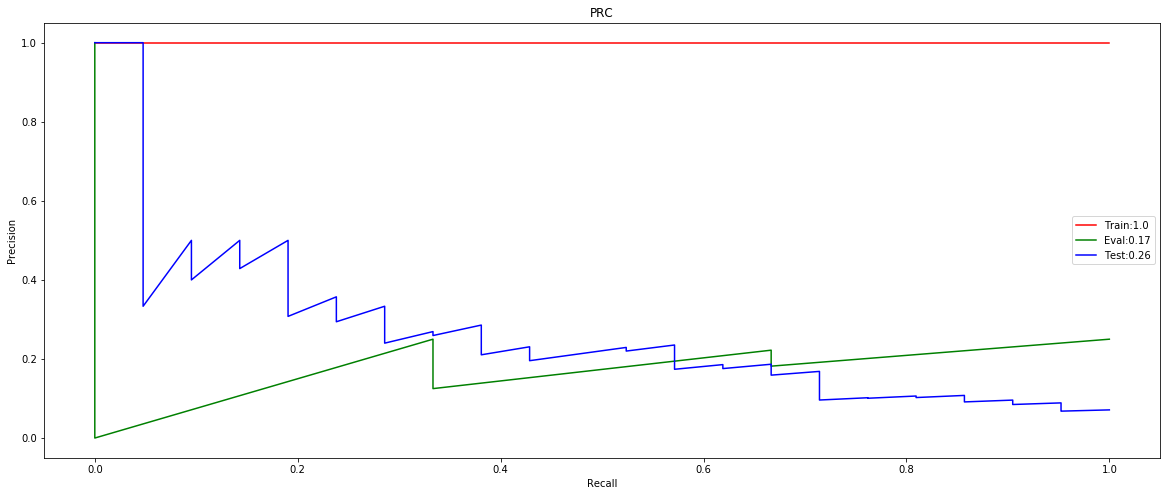

In [61]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.2,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

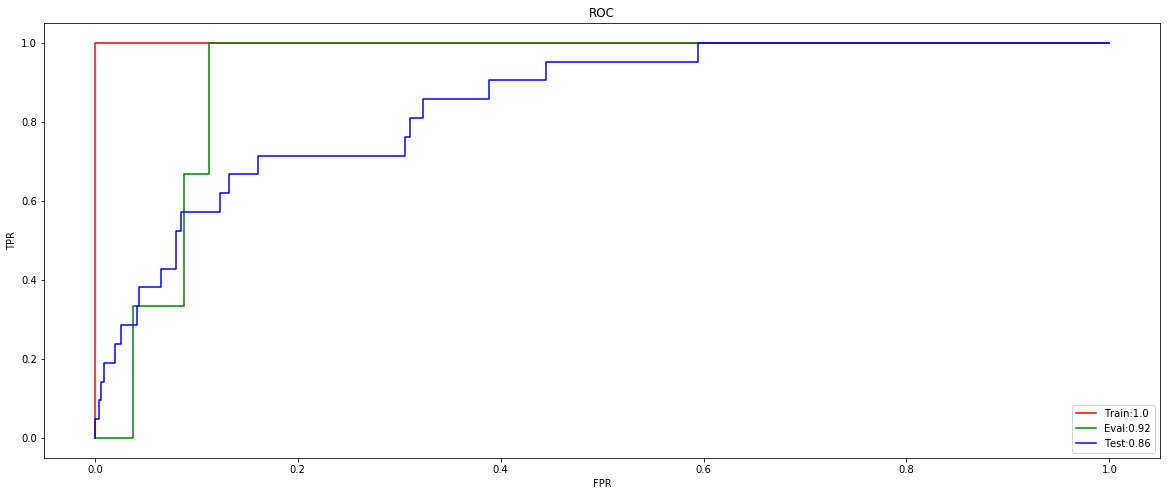

In [62]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.2,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.4,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

In [64]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals = test_y - test_pred

y_test_mean = np.mean(test_pred)
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y-y_test_mean)*(test_y-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.25494698
24.231476984791623
24.39974045475704
The R-square of the test data is  -0.007 



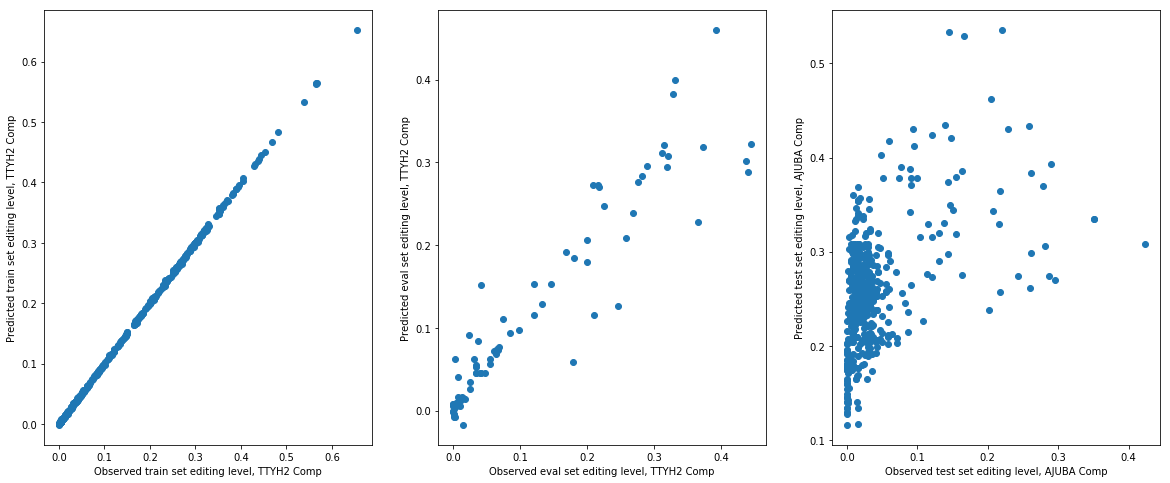

In [65]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, TTYH2 Comp")
plt.ylabel("Predicted train set editing level, TTYH2 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, TTYH2 Comp")
plt.ylabel("Predicted eval set editing level, TTYH2 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, AJUBA Comp")
plt.ylabel("Predicted test set editing level, AJUBA Comp")

plt.show()